## Rough plan for V0 notebook:
- Create characteristic plots for - graphs for univariate numerical and categorical features
- Create scatter plots & correlation matrixes.
- Drop columns AND add in missing values if indicated for some columns.
- Train LightGBM - random forest, XGBoost using KFold; Make necessary assumptions.

## this `rough_notebook` just:
- contains simple EDA techniques based on [this](https://www.kaggle.com/code/swandipsingha/only-eda-that-you-need#Numerical-Features-vs-Label)

## Overview.

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv("data/s5e6/train.csv")
train_df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [5]:
train_df.shape

(750000, 10)

In [7]:
### general info.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [8]:
### numerical features.
train_df.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [9]:
### first 10 rows.
train_df.head(10)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
5,5,30,59,29,Red,Pulses,10,0,9,20-20
6,6,27,62,53,Sandy,Paddy,26,15,22,28-28
7,7,36,62,44,Red,Pulses,30,12,35,14-35-14
8,8,36,51,32,Loamy,Tobacco,19,17,29,17-17-17
9,9,28,50,35,Red,Tobacco,25,12,16,20-20


In [15]:
numerical_cats = [x for x in list(train_df.describe().columns) if x != "id"]
numerical_cats

['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

### Univariate analysis of data for numeric columns.

- Graphical: box-plot, histogram.
- Non-graphical: skewness, missing values.

tdlr:
- boxplot: just a 5 marker summary about the line of the numeric data, the mean, median, Q1, Q3, IQR and the whiskers indicating the ends of the dataset.
- histograms: the pdf of the data, when you check the different intervals 0-x, x-2*x; also the the total area of the graph always comes out to be 1.
- skewness: just a measure of whether the data has a fat tail on it's left or right side.
- missing_values: self-explanatory

In [23]:
def univariate_feature_plots(feature_name):
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[feature_name], kde = True, bins = 30)
    plt.title(f"Histogram of {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.boxplot(x = train_df[feature_name])
    plt.title(f"Box plot of {feature_name}")

    plt.tight_layout()
    plt.show()

    print(f"Statistics: for {feature_name}", end = '\n')
    print(f"Skewness: {train_df[feature_name].skew():.2f}")
    print(f"Number of missing values: {train_df[train_df[feature_name].isnull()].shape[0]}")

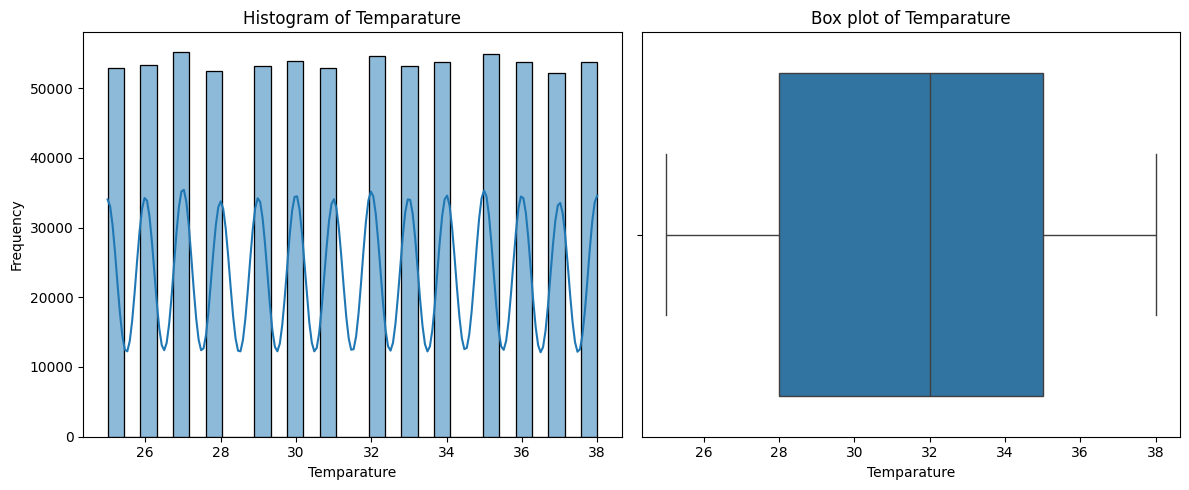

Statistics: for Temparature
Skewness: -0.00
Number of missing values: 0


In [24]:
univariate_feature_plots(feature_name = numerical_cats[0])

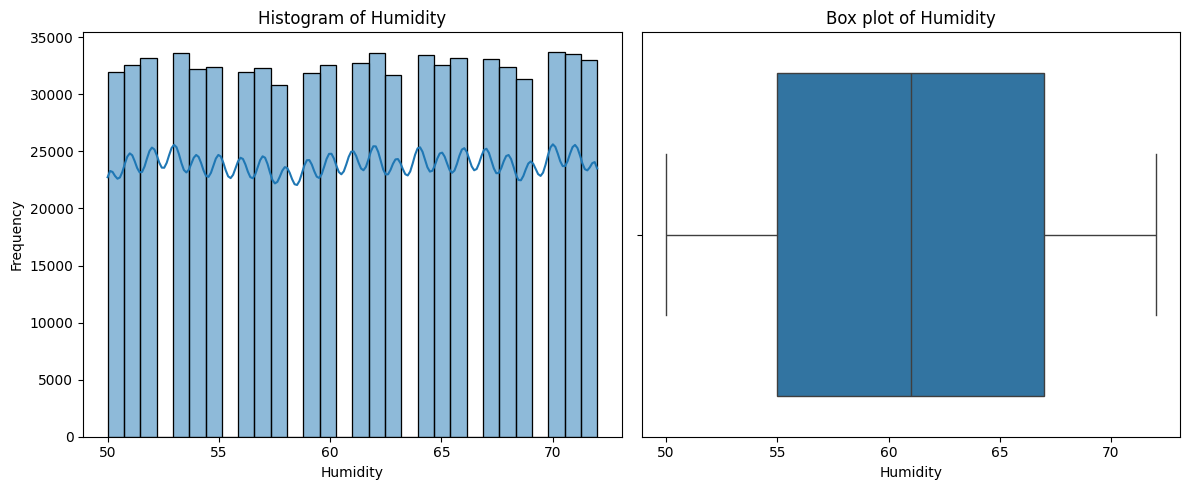

Statistics: for Humidity
Skewness: -0.01
Number of missing values: 0


In [25]:
univariate_feature_plots(feature_name = numerical_cats[1])

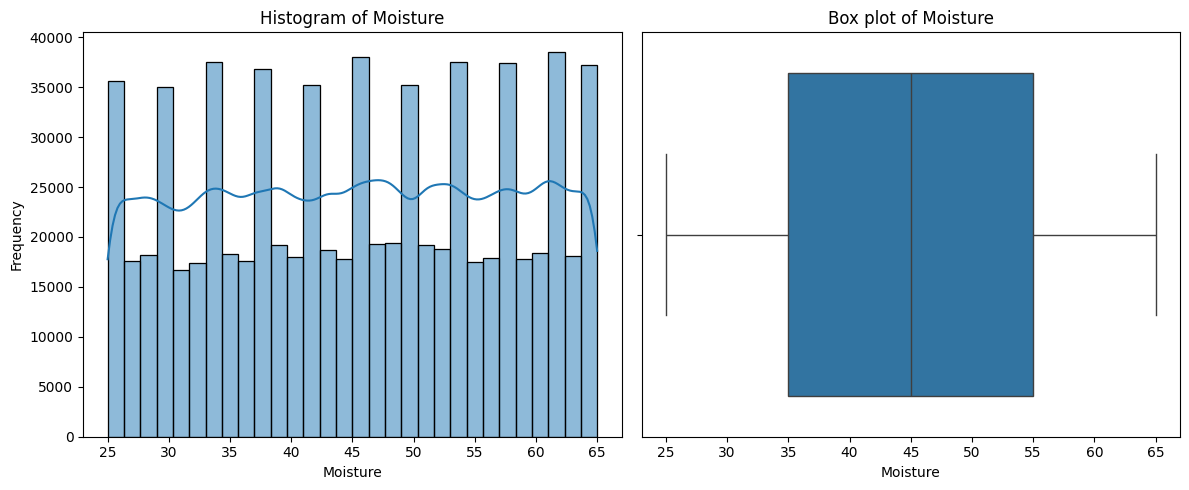

Statistics: for Moisture
Skewness: -0.02
Number of missing values: 0


In [26]:
univariate_feature_plots(feature_name = numerical_cats[2])

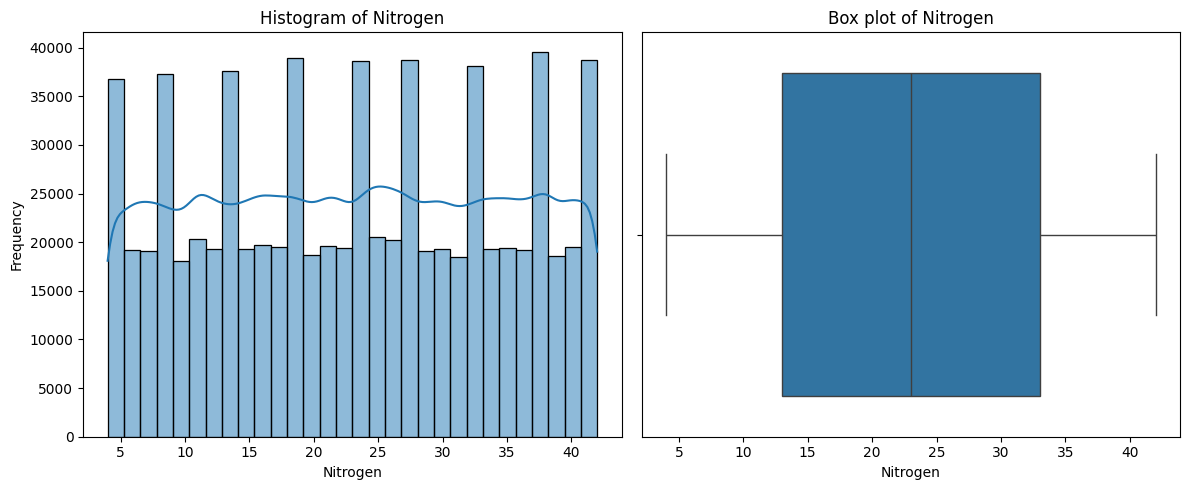

Statistics: for Nitrogen
Skewness: -0.01
Number of missing values: 0


In [27]:
univariate_feature_plots(feature_name = numerical_cats[3])

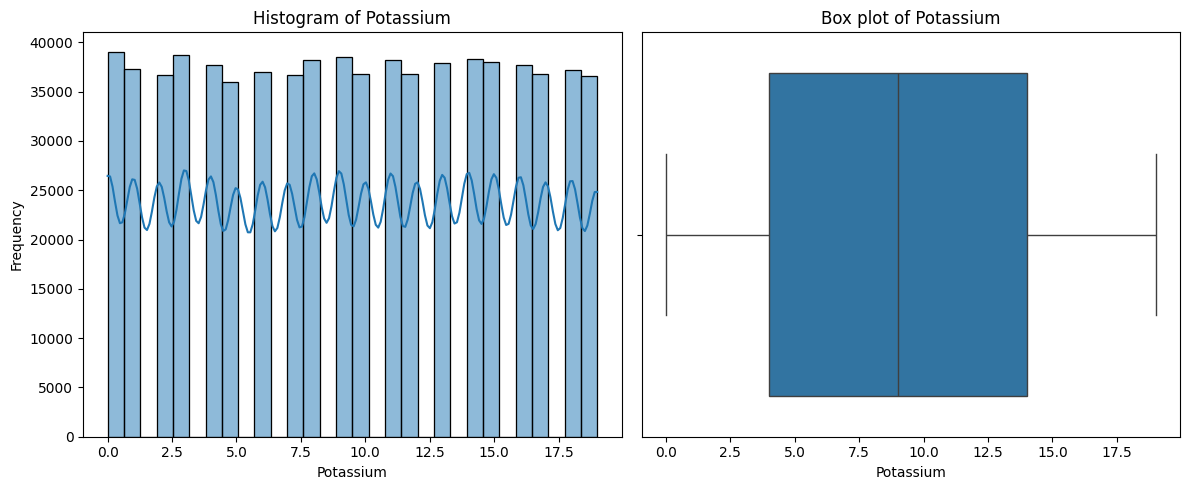

Statistics: for Potassium
Skewness: -0.00
Number of missing values: 0


In [28]:
univariate_feature_plots(feature_name = numerical_cats[4])

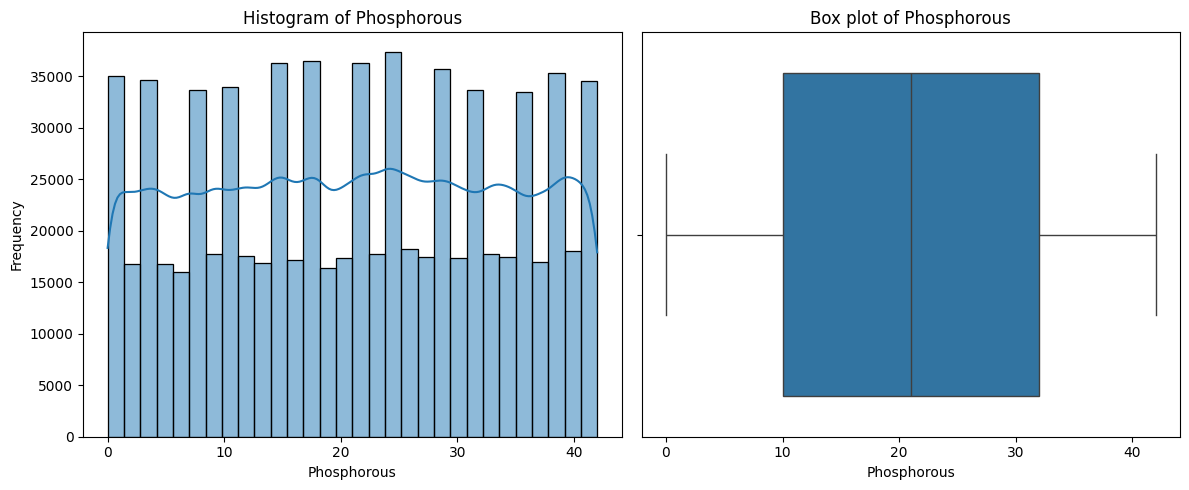

Statistics: for Phosphorous
Skewness: -0.01
Number of missing values: 0


In [29]:
univariate_feature_plots(feature_name = numerical_cats[5])

In [33]:
target_feature = "Fertilizer Name"
categorical_features = [x for x in train_df.columns if x not in numerical_cats and x != "id" and x != target_feature]
categorical_features 

['Soil Type', 'Crop Type']

### Categorical Features.
- Pie Chart of the values.
- Number of missing values.

In [43]:
def plot_distribution_of_categorical_feature(feature_name):
    counts = train_df[feature_name].value_counts() ## 
    plt.figure(figsize = (10, 10))
    plt.subplot(2, 1, 1)
    plt.pie(counts, labels = counts.index, autopct = "%1.2f%%")
    plt.title(f"Distribution of {feature_name}")
    plt.axis("equal")

    plt.subplot(2, 1, 2)
    sns.countplot(x = feature_name, data = train_df)
    plt.show()

    print(f"Number of unique {feature_name} values: {counts.shape[0]}")
    print(f"Missing Values in {feature_name}: {train_df[train_df[feature_name].isnull()].shape[0]}")

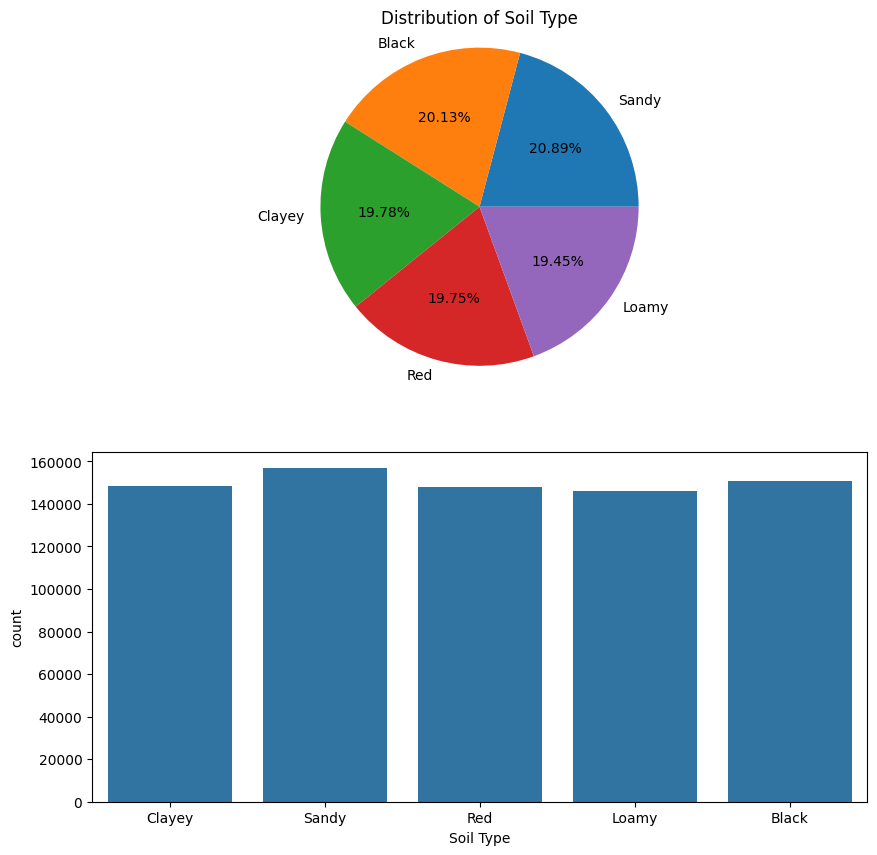

Number of unique Soil Type values: 5
Missing Values in Soil Type: 0


In [44]:
plot_distribution_of_categorical_feature(categorical_features[0])

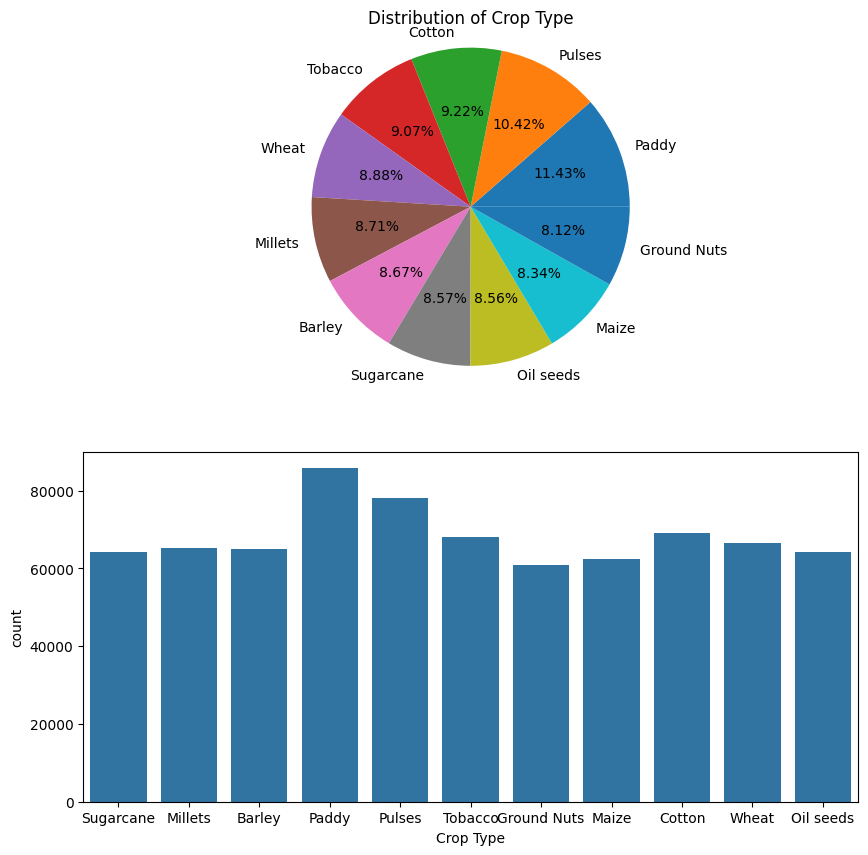

Number of unique Crop Type values: 11
Missing Values in Crop Type: 0


In [45]:
plot_distribution_of_categorical_feature(categorical_features[1])

## Bivariate analysis.
- Scatter plots between the numerical features.
- Correlation matrix for numerical feature vs. label AND categorical feature vs. label

In [47]:
numerical_df = train_df[numerical_cats]
numerical_df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,37,70,36,36,4,5
1,27,69,65,30,6,18
2,29,63,32,24,12,16
3,35,62,54,39,12,4
4,35,58,43,37,2,16


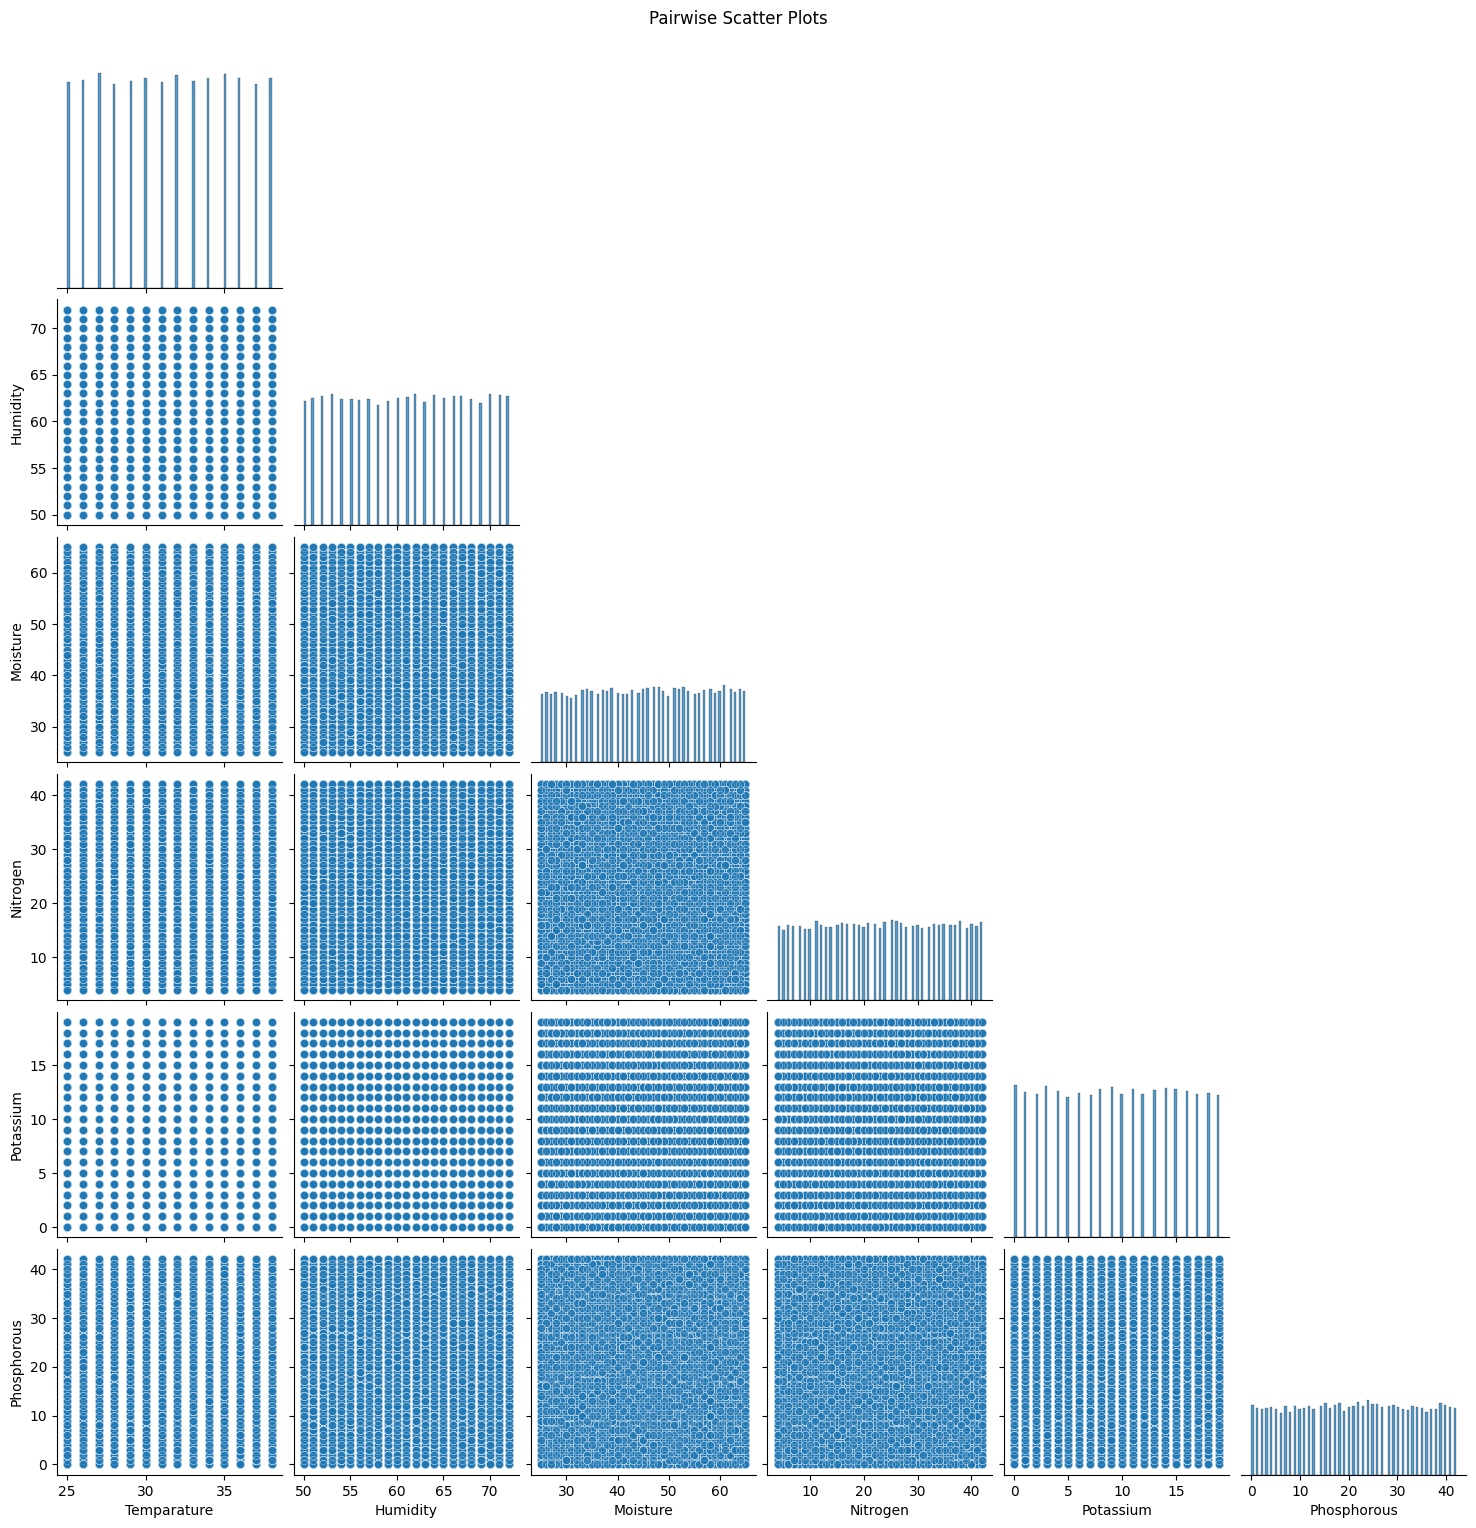

In [48]:
sns.pairplot(numerical_df, corner = True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Scatter Plots', y = 1.02)
plt.show()

In [49]:
# scatterplot of feature vs. label.
def plot_scatter_plot_with_label(feature_name):
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = train_df[feature_name], y = train_df[target_feature], alpha = 0.5)
    plt.title(f"{feature_name} vs. {target_feature}")
    plt.show()

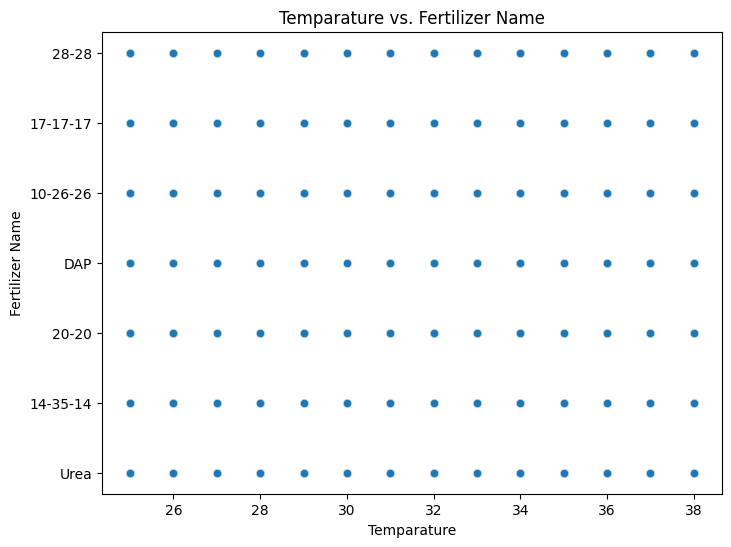

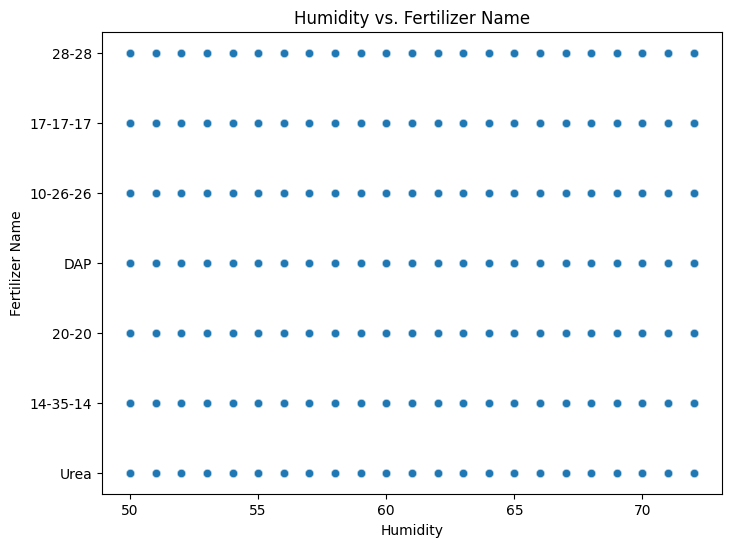

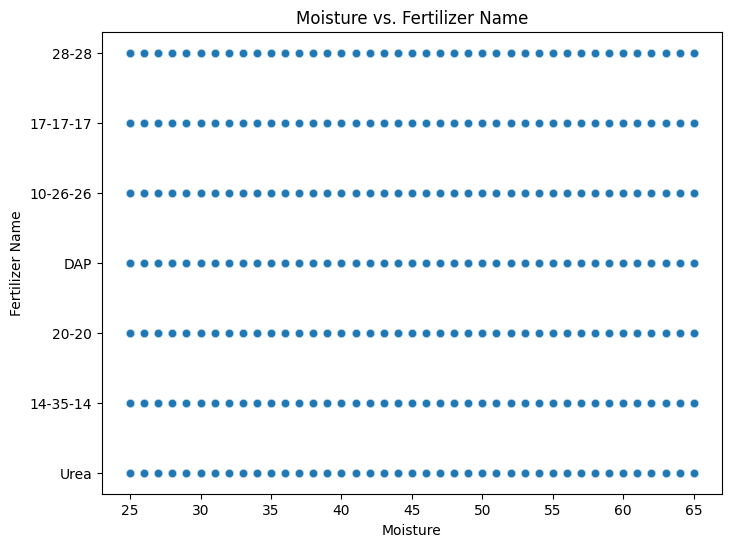

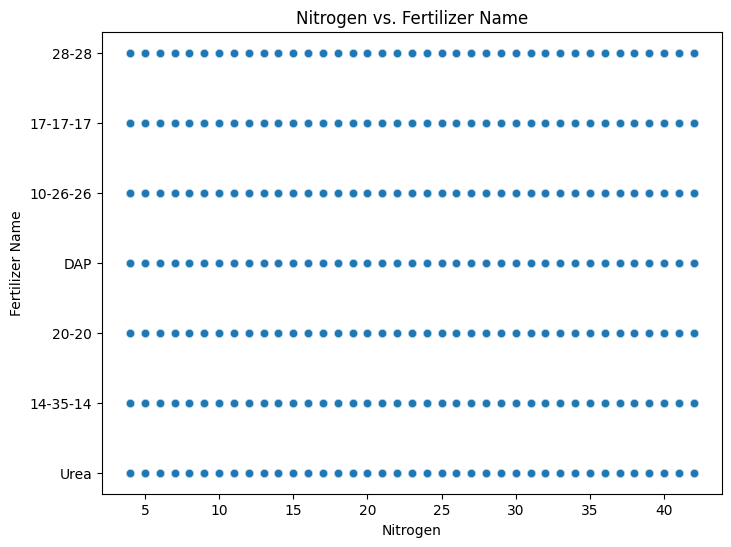

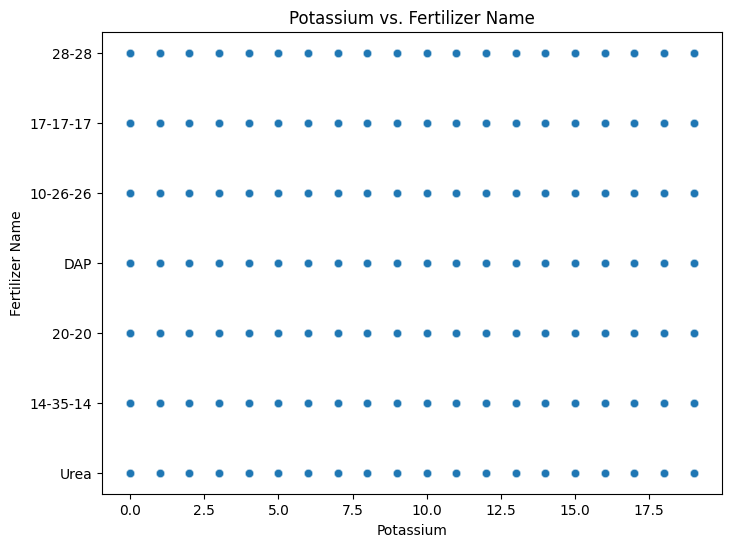

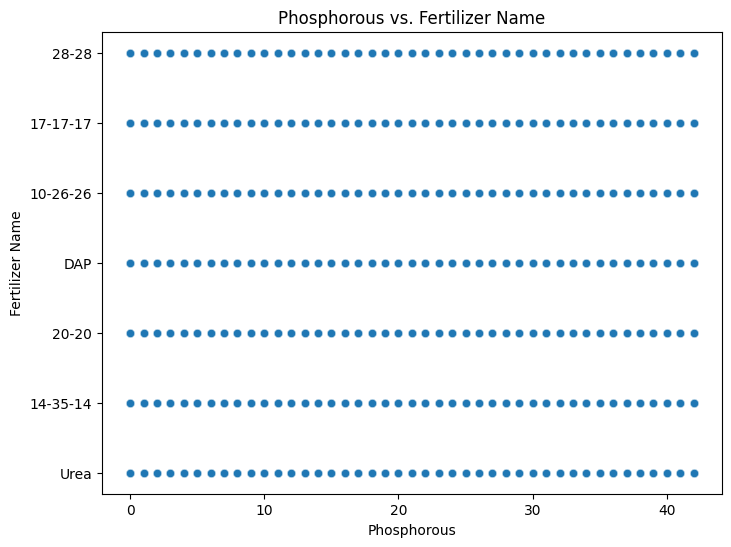

In [50]:
for cat in numerical_cats:
    plot_scatter_plot_with_label(cat)

Text(0.5, 1.0, 'Correlation between numerical features')

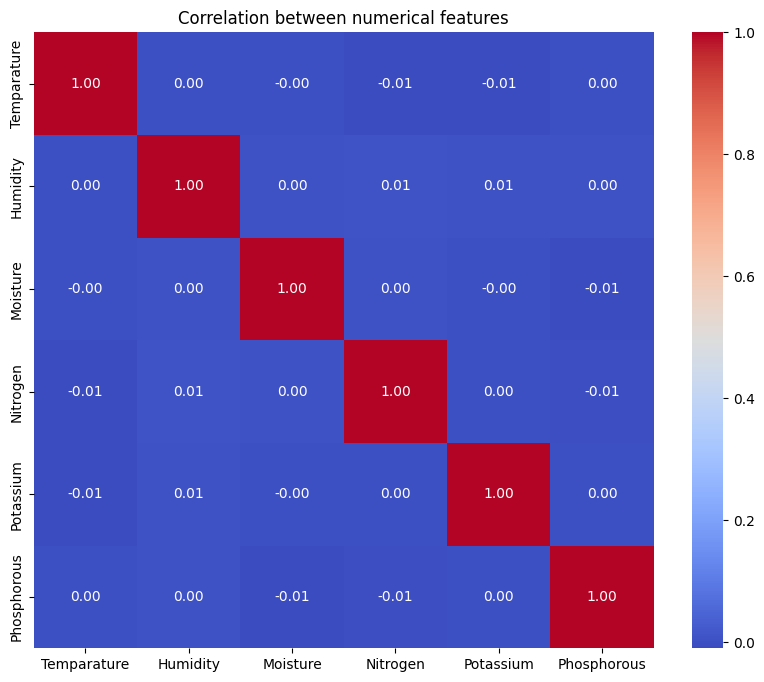

In [52]:
## correlation matrix.
corr_matrix = train_df[numerical_cats].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation between numerical features")

In [56]:
def plot_heatmap_and_distribution_of_categorical_features(feature_name):
    plt.figure(figsize = (12, 12))
    plt.subplot(2, 1, 1)
    sns.countplot(x = feature_name, hue = target_feature, data = train_df)
    plt.title(f"Distribution of {target_feature} across {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.legend(title = target_feature, bbox_to_anchor = (1.05, 1), loc = "upper left")
    plt.tight_layout()

    plt.subplot(2, 1, 2)
    sns.heatmap(pd.crosstab(train_df[feature_name], train_df[target_feature]), annot = True, fmt = "d")
    plt.title(f"{feature_name} vs. {target_feature} (Counts)")
    plt.ylabel(feature_name)
    plt.xlabel(target_feature)
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 0)
    plt.tight_layout()
    plt.show()

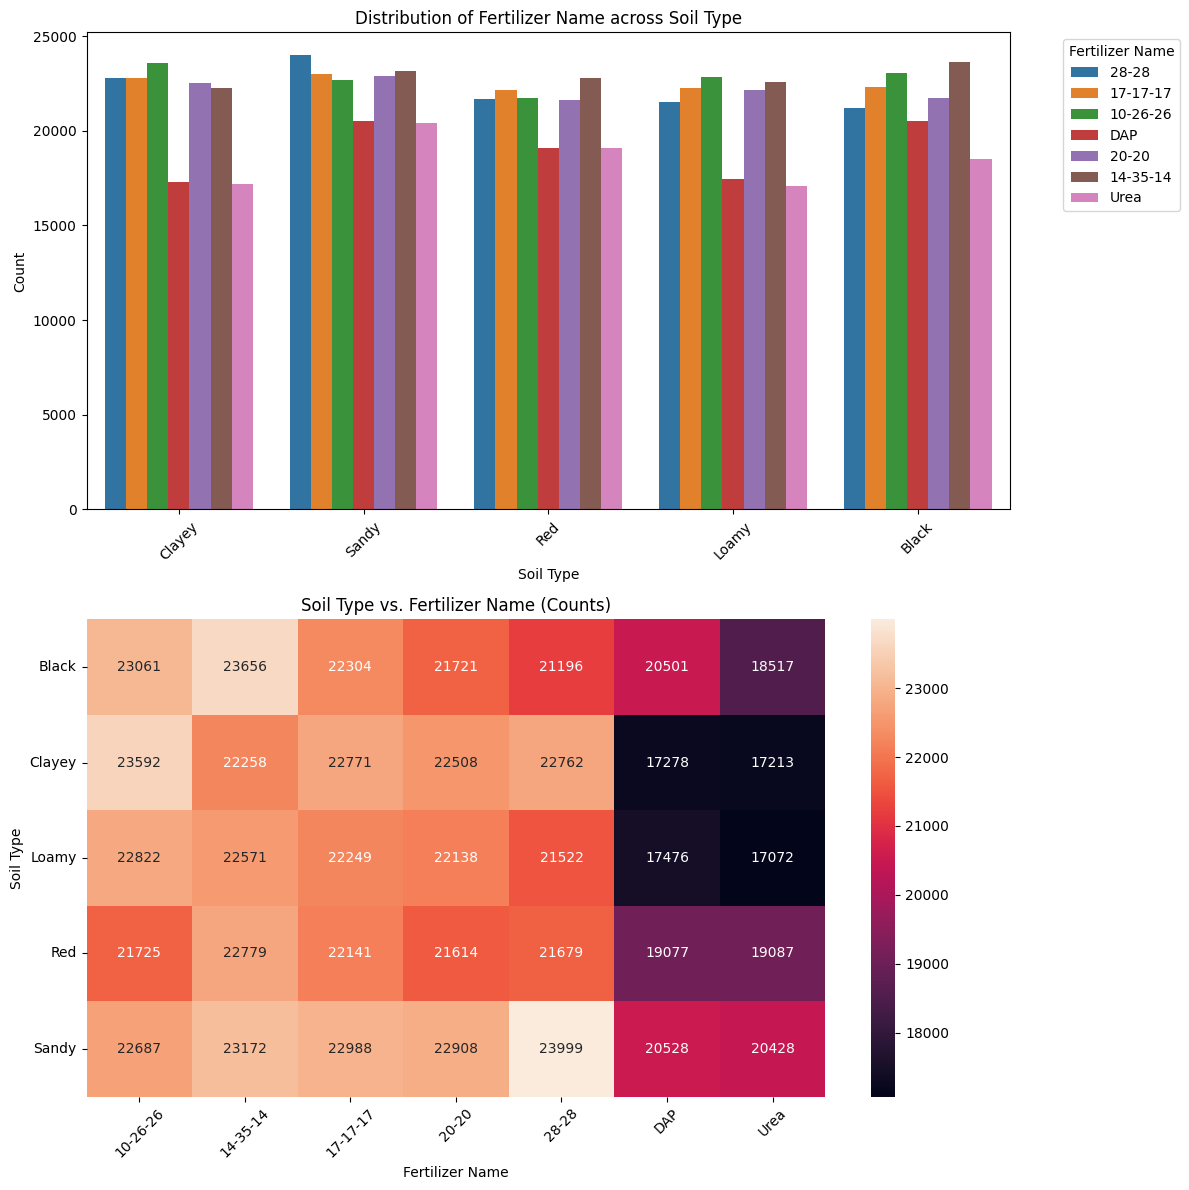

In [57]:
plot_heatmap_and_distribution_of_categorical_features(categorical_features[0])

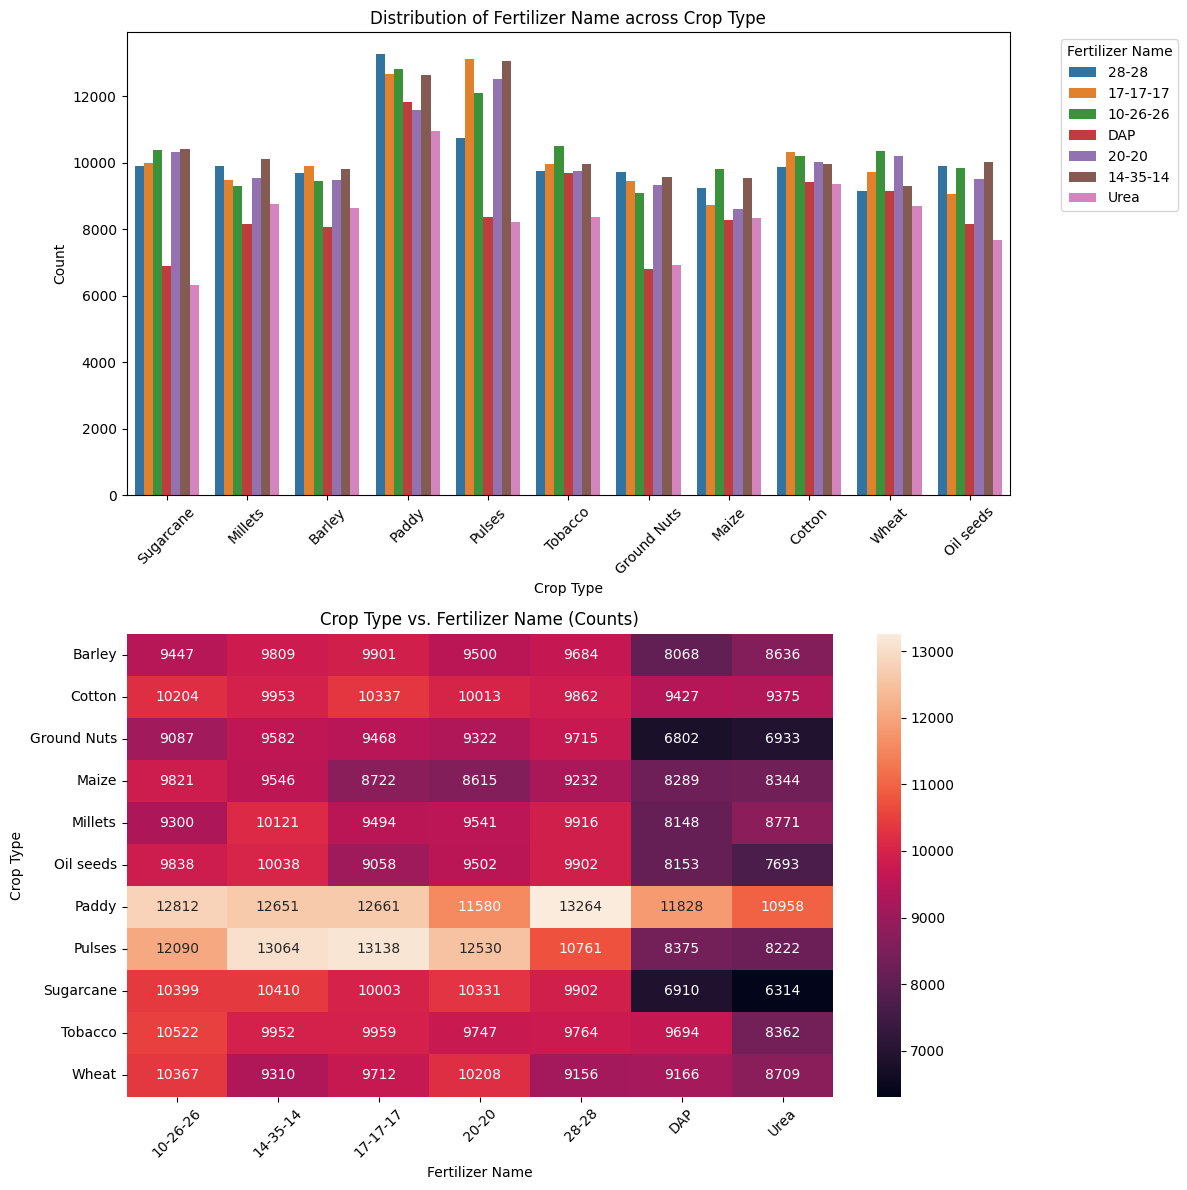

In [58]:
plot_heatmap_and_distribution_of_categorical_features(categorical_features[1])